In [56]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [57]:
heart = pd.read_csv("D:/Jobin/DataTrained/Evaluation Projects/Heart disease/Heart Disease.csv")
heart

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [58]:
heart.columns = ['age', 'sex', 'chest pain type', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'diagnosis']
heart

,age,sex,chest pain type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [59]:
heart.isnull().sum()

age                0
sex                0
chest pain type    0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 0
thal               0
diagnosis          0
dtype: int64

Eventhough there are no null values, we se that there are some '?' in some columns. Replacing them with NaN

In [60]:
heart = heart.replace('?', np.NaN)
heart

,age,sex,chest pain type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [61]:
heart.isnull().sum()

age                0
sex                0
chest pain type    0
trestbps           0
chol               0
fbs                0
restecg            0
thalach            0
exang              0
oldpeak            0
slope              0
ca                 4
thal               2
diagnosis          0
dtype: int64

since the number of null values is too low, I am dropping the rows with NaN

In [62]:
heart.dropna(axis = 0, inplace = True)

In [63]:
heart

,age,sex,chest pain type,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


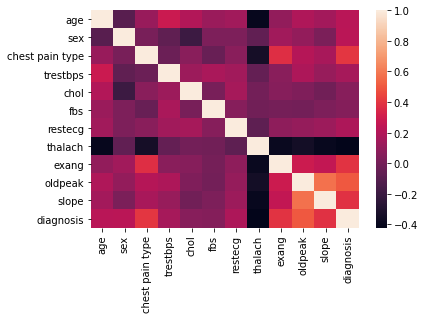

In [64]:
sns.heatmap(heart.corr())

correlation of thalach with diagnosis seems to be very low. Hence I am dropping it

In [65]:
heart.drop('thalach', axis = 1, inplace = True)
heart

,age,sex,chest pain type,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,1.0,1.2,2.0,1.0,7.0,3


as per the problem description, 0 means no heart disease and 1-3 represent presence of heart disease

In [66]:
heart.diagnosis.unique()

array([2, 1, 0, 3, 4], dtype=int64)

In [67]:
heart.replace(to_replace=[1, 2, 3],
           value= [1, 1, 1], 
           inplace=True)
heart

,age,sex,chest pain type,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,diagnosis
0,67.0,1.0,4.0,160.0,286.0,0.0,1.0,1.0,1.5,1.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,1.0,1.0,2.6,1.0,2.0,7.0,1
2,37.0,1.0,1.0,130.0,250.0,0.0,0.0,0.0,3.5,1.0,0.0,3.0,0
3,41.0,0.0,1.0,130.0,204.0,0.0,1.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,1.0,120.0,236.0,0.0,0.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,1.0,0.2,1.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,0.0,1.2,1.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,0.0,3.4,1.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,1.0,1.2,1.0,1.0,7.0,1


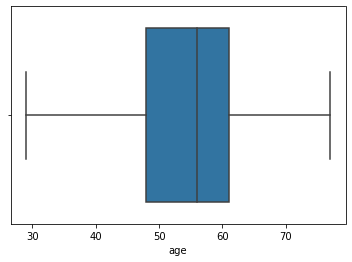

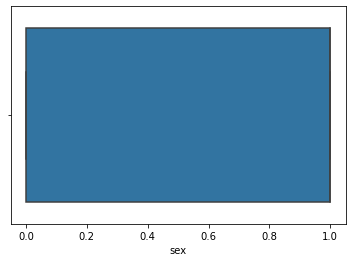

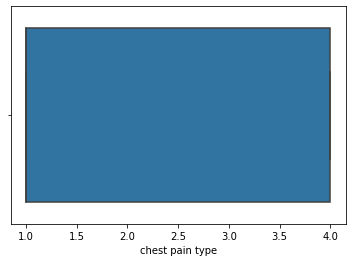

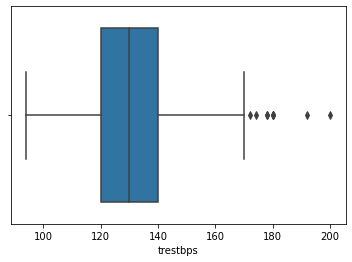

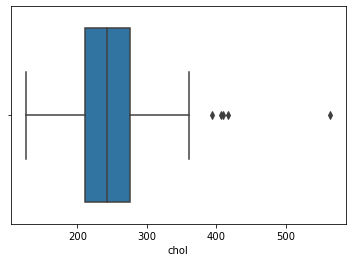

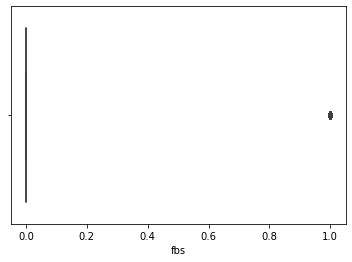

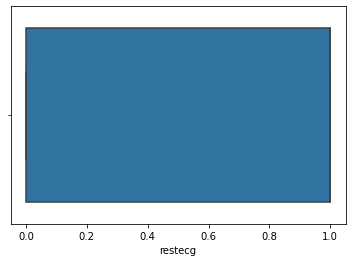

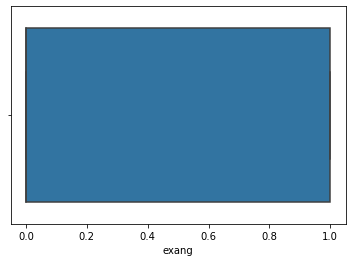

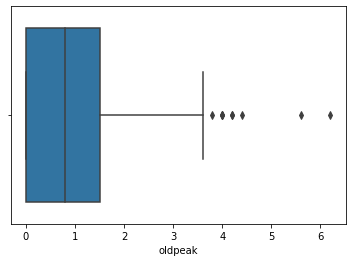

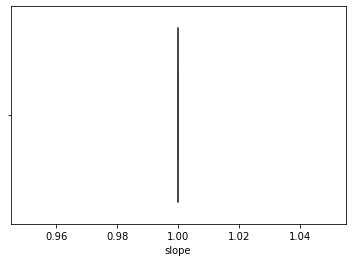

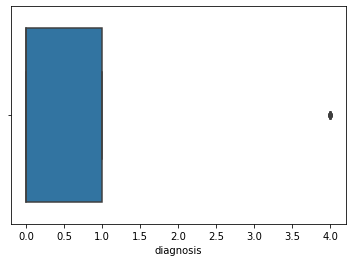

In [68]:
for i in heart.describe().columns:
    sns.boxplot(heart[i].dropna())
    plt.show()

In [69]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              296 non-null    float64
 1   sex              296 non-null    float64
 2   chest pain type  296 non-null    float64
 3   trestbps         296 non-null    float64
 4   chol             296 non-null    float64
 5   fbs              296 non-null    float64
 6   restecg          296 non-null    float64
 7   exang            296 non-null    float64
 8   oldpeak          296 non-null    float64
 9   slope            296 non-null    float64
 10  ca               296 non-null    object 
 11  thal             296 non-null    object 
 12  diagnosis        296 non-null    int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 32.4+ KB


In [70]:
heart['ca'] = heart.ca.astype(float)

In [71]:
heart['thal'] = heart.thal.astype(float)

In [72]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 300
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              296 non-null    float64
 1   sex              296 non-null    float64
 2   chest pain type  296 non-null    float64
 3   trestbps         296 non-null    float64
 4   chol             296 non-null    float64
 5   fbs              296 non-null    float64
 6   restecg          296 non-null    float64
 7   exang            296 non-null    float64
 8   oldpeak          296 non-null    float64
 9   slope            296 non-null    float64
 10  ca               296 non-null    float64
 11  thal             296 non-null    float64
 12  diagnosis        296 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 32.4 KB


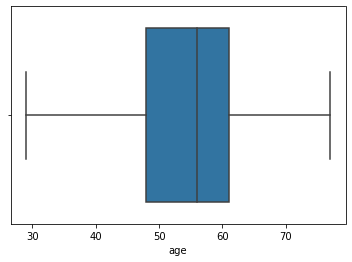

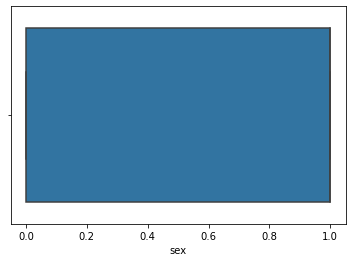

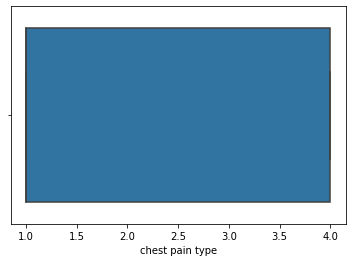

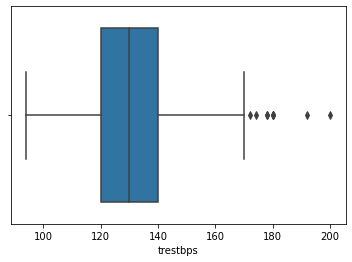

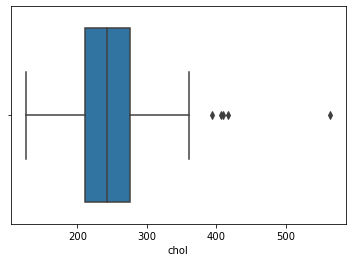

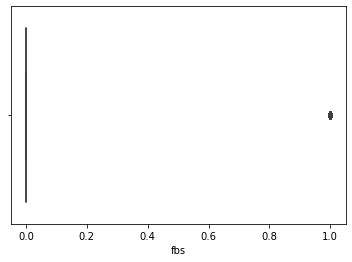

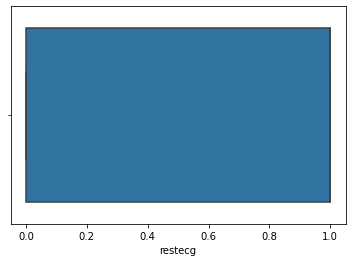

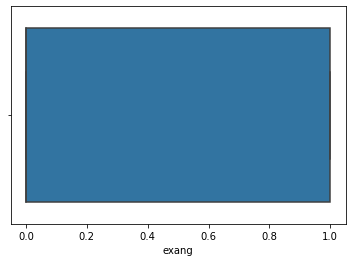

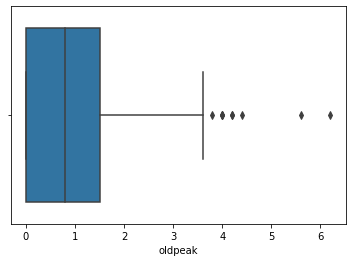

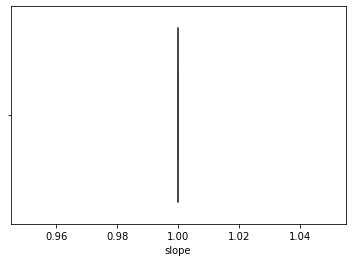

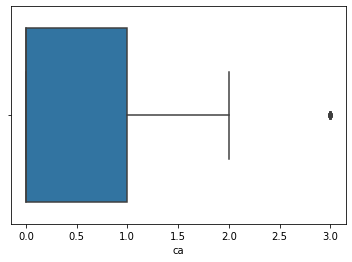

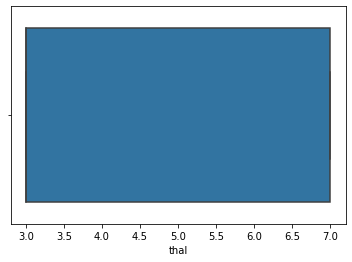

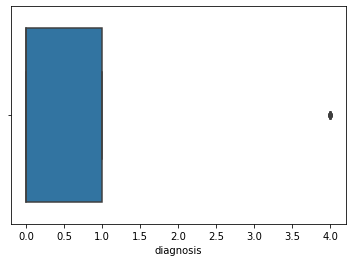

In [73]:
for i in heart.describe().columns:
    sns.boxplot(heart[i].dropna())
    plt.show()

In [74]:
heart.fbs.unique()

array([0., 1.])

In [75]:
X = heart.drop('diagnosis', axis = 1)
Y = heart['diagnosis']

In [77]:
Y.shape

(296,)

In [78]:
Y = Y.values.reshape(-1,1)
Y.shape

(296, 1)

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [80]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.381810,0.692820,1.041397,1.597628,0.742464,-0.406638,0.993266,1.432322,0.457037,0.0,2.473994,-0.891149
1,1.381810,0.692820,1.041397,-0.656413,-0.353882,-0.406638,0.993266,1.432322,1.437348,0.0,1.408052,1.173666
2,-1.938123,0.692820,-0.960249,-0.092903,0.050035,-0.406638,-1.006780,-0.698167,2.239421,0.0,-0.723832,-0.891149
3,-1.495465,-1.443376,-0.960249,-0.092903,-0.834736,-0.406638,0.993266,-0.698167,0.367918,0.0,-0.723832,-0.891149
4,0.164501,0.692820,-0.960249,-0.656413,-0.219243,-0.406638,-1.006780,-0.698167,-0.166797,0.0,-0.723832,-0.891149
...,...,...,...,...,...,...,...,...,...,...,...,...
291,0.275166,-1.443376,1.041397,0.470607,-0.123073,-0.406638,-1.006780,1.432322,-0.701513,0.0,-0.723832,1.173666
292,-1.052807,0.692820,-0.960249,-1.219924,0.319313,-0.406638,-1.006780,-0.698167,0.189679,0.0,-0.723832,1.173666
293,1.492474,0.692820,1.041397,0.696011,-1.046312,2.459191,-1.006780,-0.698167,2.150302,0.0,1.408052,1.173666
294,0.275166,0.692820,1.041397,-0.092903,-2.238829,-0.406638,-1.006780,1.432322,0.189679,0.0,0.342110,1.173666


In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# DecisionTree

In [84]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
dtc.score(X_train, Y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(Y_test, preddtc))
print(confusion_matrix(Y_test, preddtc))
print(classification_report(Y_test, preddtc))

0.6833333333333333
[[29  7  0]
 [ 9 11  1]
 [ 0  2  1]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.55      0.52      0.54        21
           4       0.50      0.33      0.40         3

    accuracy                           0.68        60
   macro avg       0.60      0.55      0.57        60
weighted avg       0.68      0.68      0.68        60



In [85]:
print('Mean absolute error:', mean_absolute_error(Y_test, preddtc))
print('Mean squared error:', mean_squared_error(Y_test, preddtc))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, preddtc)))
print('R2 score is:', r2_score(Y_test, preddtc))

Mean absolute error: 0.4166666666666667
Mean squared error: 0.7166666666666667
Root Mean squared error: 0.8465616732800196
R2 score is: 0.15437561455260596


# KNeighbors

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
knn.score(X_train, Y_train)
predknn = knn.predict(X_test)
print(accuracy_score(Y_test, predknn))
print(confusion_matrix(Y_test, predknn))
print(classification_report(Y_test, predknn))

0.8333333333333334
[[33  3  0]
 [ 4 17  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.74      0.81      0.77        21
           4       0.00      0.00      0.00         3

    accuracy                           0.83        60
   macro avg       0.54      0.58      0.56        60
weighted avg       0.79      0.83      0.81        60



In [87]:
print('Mean absolute error:', mean_absolute_error(Y_test, predknn))
print('Mean squared error:', mean_squared_error(Y_test, predknn))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predknn)))
print('R2 score is:', r2_score(Y_test, predknn))

Mean absolute error: 0.26666666666666666
Mean squared error: 0.5666666666666667
Root Mean squared error: 0.752772652709081
R2 score is: 0.3313667649950838


# SVC

In [88]:
svck = SVC(kernel = 'poly')
svck.fit(X_train, Y_train)
svck.score(X_train, Y_train)
predsvck = svck.predict(X_test)
print(accuracy_score(Y_test, predsvck))
print(confusion_matrix(Y_test, predsvck))
print(classification_report(Y_test, predsvck)) 

0.85
[[34  2  0]
 [ 4 17  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        36
           1       0.77      0.81      0.79        21
           4       0.00      0.00      0.00         3

    accuracy                           0.85        60
   macro avg       0.56      0.58      0.57        60
weighted avg       0.81      0.85      0.83        60



In [89]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvck))
print('Mean squared error:', mean_squared_error(Y_test, predsvck))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvck)))
print('R2 score is:', r2_score(Y_test, predsvck))

Mean absolute error: 0.25
Mean squared error: 0.55
Root Mean squared error: 0.7416198487095663
R2 score is: 0.3510324483775813


In [90]:
svcr = SVC(kernel = 'rbf')
svcr.fit(X_train, Y_train)
svcr.score(X_train, Y_train)
predsvcr = svcr.predict(X_test)
print(accuracy_score(Y_test, predsvcr))
print(confusion_matrix(Y_test, predsvcr))
print(classification_report(Y_test, predsvcr)) 

0.85
[[33  3  0]
 [ 3 18  0]
 [ 0  3  0]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.75      0.86      0.80        21
           4       0.00      0.00      0.00         3

    accuracy                           0.85        60
   macro avg       0.56      0.59      0.57        60
weighted avg       0.81      0.85      0.83        60



In [91]:
print('Mean absolute error:', mean_absolute_error(Y_test, predsvcr))
print('Mean squared error:', mean_squared_error(Y_test, predsvcr))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predsvcr)))
print('R2 score is:', r2_score(Y_test, predsvcr))

Mean absolute error: 0.25
Mean squared error: 0.55
Root Mean squared error: 0.7416198487095663
R2 score is: 0.3510324483775813


# LogisticRegression

In [94]:
LgR = LogisticRegression()
LgR.fit(X_train, Y_train)

LogisticRegression()

In [95]:
predictions = LgR.predict(X_test)
predictions

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

In [96]:
from sklearn.metrics import confusion_matrix, classification_report

In [97]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.85

SVC and Logistic regression give better performance

In [98]:
import pickle
filename = 'heart_LgR.pkl'
pickle.dump(LgR, open(filename, 'wb'))